In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

thermal_data = pd.read_csv('/home/mremington/Documents/therma_sim/therma_sim/Empirical_Data/thermal_ts.csv')
thermal_data['datetime'] = pd.to_datetime(thermal_data[['year', 'month', 'day', 'hour', 'minute']])
thermal_data.head()

,Date,Unit,Body,year,month,day,hour,minute,Study_Site,Snake_Name,...,Astronomical_Season,SunMoon_Category,Simple_DayPeriod,Meteorological_Season,Air,Burrow,Half,Open,Shrub,datetime
0,2022-06-17 23:00:01,C,21.071,2022,6,17,23,0,Canada,Moose,...,Spring,WaningGibbous,Night,Summer,22.580,17.1365,19.931333,21.1220,21.633000,2022-06-17 23:00:00
1,2022-06-18 00:10:01,C,21.071,2022,6,18,0,10,Canada,Moose,...,Spring,WaningGibbous,Night,Summer,20.579,17.1365,18.763333,18.3690,18.963333,2022-06-18 00:10:00
2,2022-06-18 01:20:01,C,20.571,2022,6,18,1,20,Canada,Moose,...,Spring,WaningGibbous,Night,Summer,21.079,16.8865,18.763333,19.1205,19.965000,2022-06-18 01:20:00
3,2022-06-18 02:30:01,C,20.571,2022,6,18,2,30,Canada,Moose,...,Spring,WaningGibbous,Night,Summer,19.077,16.6355,17.261333,16.3660,17.628000,2022-06-18 02:30:00
4,2022-06-18 03:40:01,C,20.571,2022,6,18,3,40,Canada,Moose,...,Spring,Sunset,Dusk,Summer,18.077,16.3850,16.760333,15.3645,16.458667,2022-06-18 03:40:00


In [2]:
thermal_data.columns

Index(['Date', 'Unit', 'Body', 'year', 'month', 'day', 'hour', 'minute',
       'Study_Site', 'Snake_Name', 'file_name', 'Study_Site_Code', 'Snake_ID',
       'Date_y', 'minute_y', 'Study_Site_y', 'Astronomical_Season',
       'SunMoon_Category', 'Simple_DayPeriod', 'Meteorological_Season', 'Air',
       'Burrow', 'Half', 'Open', 'Shrub'],
      dtype='object')

Apply this to the thermal_data
- make site level data frames
- akima data interpolation to shift ts from 70 minutes to hourly window
- calculate rolling variance
- classify when rolling variance is above 12 or below 12 for brumination category
- save data out to 16 years

In [3]:
# Make individual dataframes by site
canada_df = thermal_data[thermal_data['Study_Site'] == 'Canada']
nebraska_df = thermal_data[thermal_data['Study_Site'] == 'Nebraska']
texas_df = thermal_data[thermal_data['Study_Site'] == 'Texas']

In [5]:
texas_df.head()

,Date,Unit,Body,year,month,day,hour,minute,Study_Site,Snake_Name,...,Astronomical_Season,SunMoon_Category,Simple_DayPeriod,Meteorological_Season,Air,Burrow,Half,Open,Shrub,datetime
226637,2021-06-01 22:30:01,C,19.562,2021,6,1,22,30,Texas,Dusty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-01 22:30:00
351148,2021-06-01 22:30:01,C,19.057,2021,6,1,22,30,Texas,Ringo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-01 22:30:00
226638,2021-06-01 23:40:01,C,18.060,2021,6,1,23,40,Texas,Dusty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-01 23:40:00
351149,2021-06-01 23:40:01,C,17.555,2021,6,1,23,40,Texas,Ringo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-01 23:40:00
226639,2021-06-02 00:50:01,C,20.062,2021,6,2,0,50,Texas,Dusty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-02 00:50:00


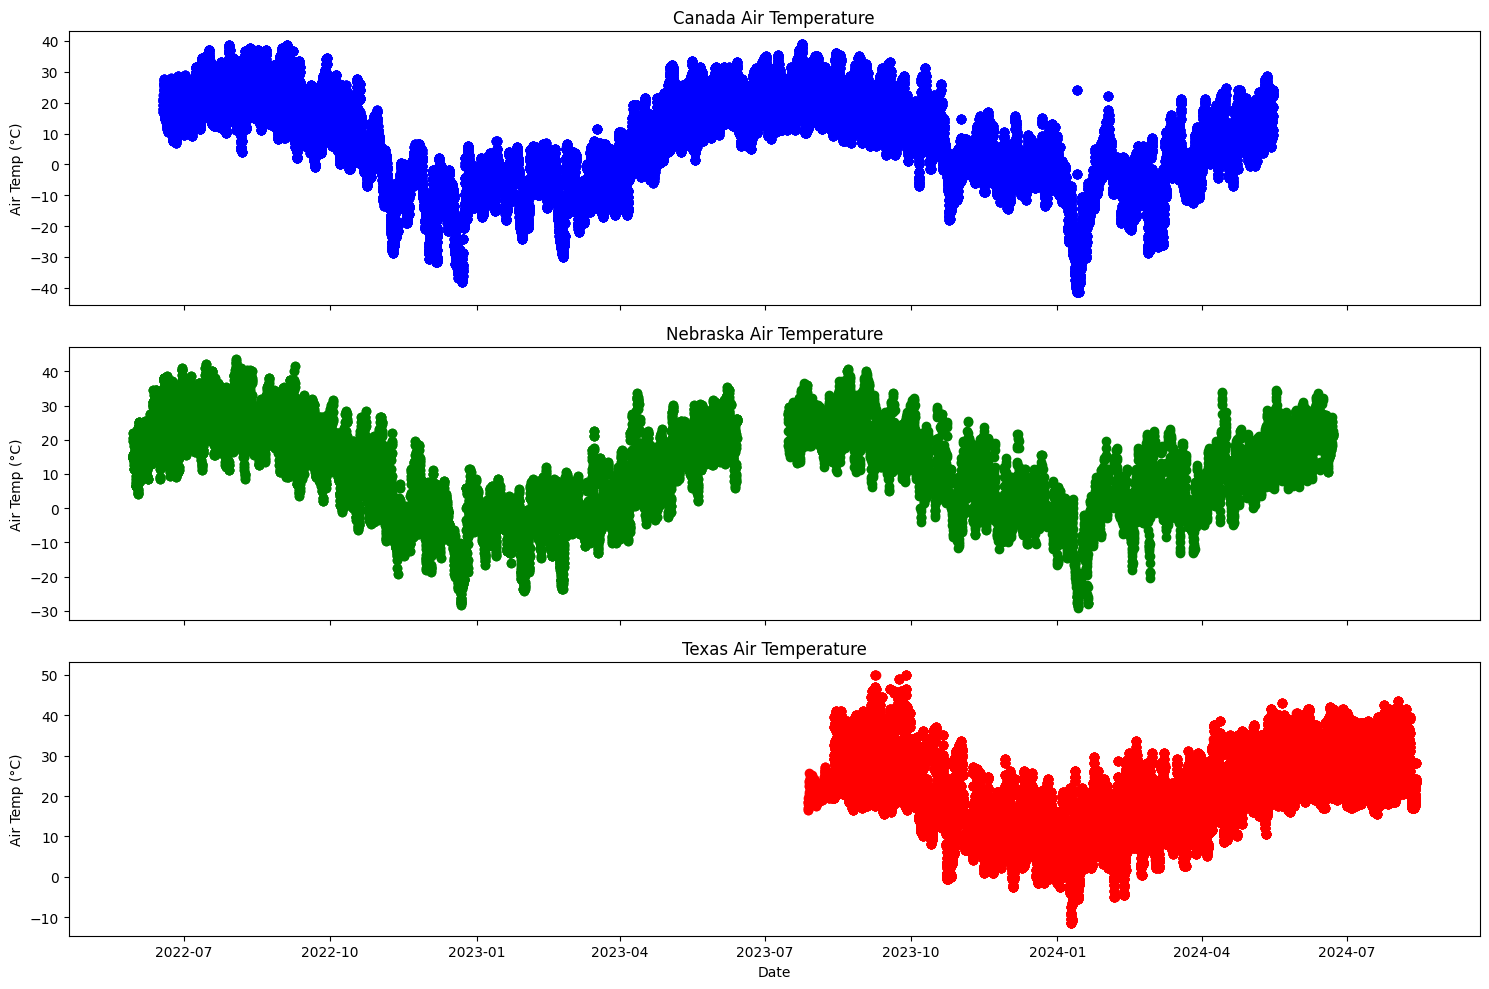

In [4]:
canada_df = canada_df.sort_values('datetime')
nebraska_df = nebraska_df.sort_values('datetime')
texas_df = texas_df.sort_values('datetime')


fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

# Plot air temperatures
axes[0].scatter(canada_df['datetime'], canada_df['Air'], label='Canada', color='blue')
axes[0].set_ylabel("Air Temp (°C)")
axes[0].set_title("Canada Air Temperature")

axes[1].scatter(nebraska_df['datetime'], nebraska_df['Air'], label='Nebraska', color='green')
axes[1].set_ylabel("Air Temp (°C)")
axes[1].set_title("Nebraska Air Temperature")

axes[2].scatter(texas_df['datetime'], texas_df['Air'], label='Texas', color='red')
axes[2].set_ylabel("Air Temp (°C)")
axes[2].set_title("Texas Air Temperature")
axes[2].set_xlabel("Date")

plt.tight_layout()
plt.show()